# <font color='green'>Machine learning - Previsão de campanha cliente - IBM Watson </font>

# <font color='black'>Previsão machine learning no marketing digital </font>

![title](imagens/a1.webp)

**Contexto**

Usando o Watson Analytics, você pode prever o comportamento para reter seus clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas focados na retenção de clientes.

**Inspiração**

Compreenda a demografia do cliente e o comportamento de compra. Use análises preditivas para analisar os clientes mais lucrativos e como eles interagem. Realize ações direcionadas para aumentar a resposta, retenção e crescimento lucrativos do cliente.

In [1]:
from platform import python_version

print('Versão do Python neste projeto:', python_version())

Versão do Python neste projeto: 3.7.4


In [2]:
!pip install -q -U watermark

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as m
import matplotlib.pyplot as plt

In [4]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.2.0
numpy     : 1.18.2
matplotlib: 3.1.1
seaborn   : 0.9.0



In [5]:
plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid") 

In [6]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [7]:
df.shape

(9134, 24)

In [8]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [9]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Análise Exploratória

In [10]:
df.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [11]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [12]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
corr = df.corr()
corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [14]:
Response=df.groupby('Response')['Customer'].count()
Response

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In [15]:
nop=df.groupby('Number of Policies')['Customer'].count()
nop

Number of Policies
1    3251
2    2294
3    1168
4     409
5     407
6     372
7     433
8     384
9     416
Name: Customer, dtype: int64

In [16]:
renda = df[df["Income"] == "Income"]
genero = df[df["Gender"] == "Gender"]
oferta = df[df["Renew Offer Type"] == "Renew Offer Type"]
vendas = df[df["Sales Channel"] == "Sales Channel"]

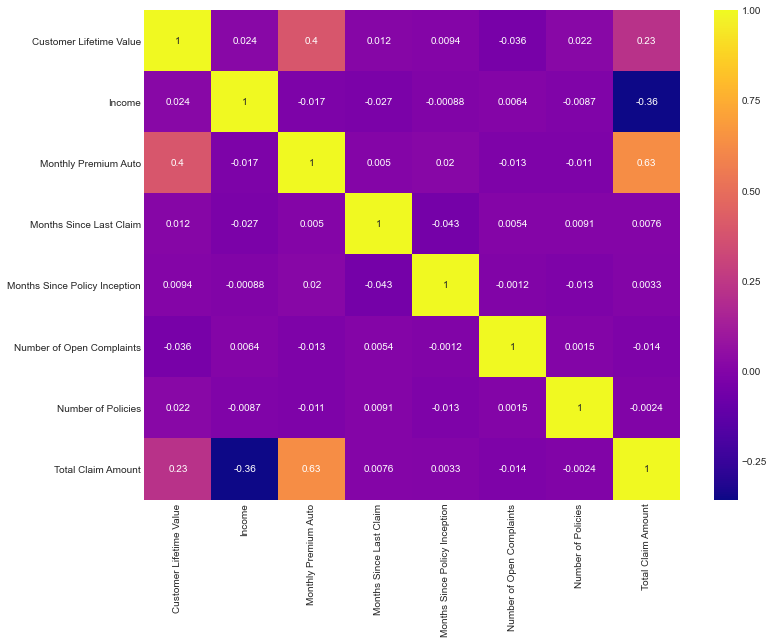

In [17]:
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corr,  cmap = 'plasma', annot= True);
plt.show()

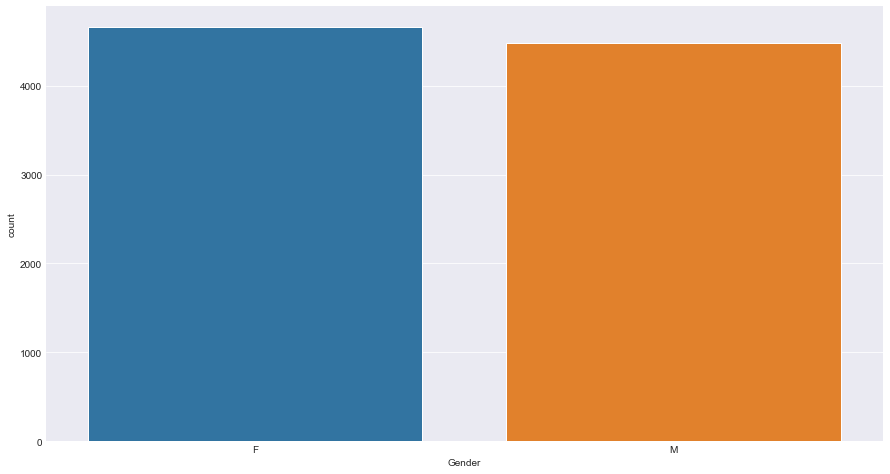

In [18]:
plt.figure(figsize=(15, 8))

sns.countplot(df["Gender"])

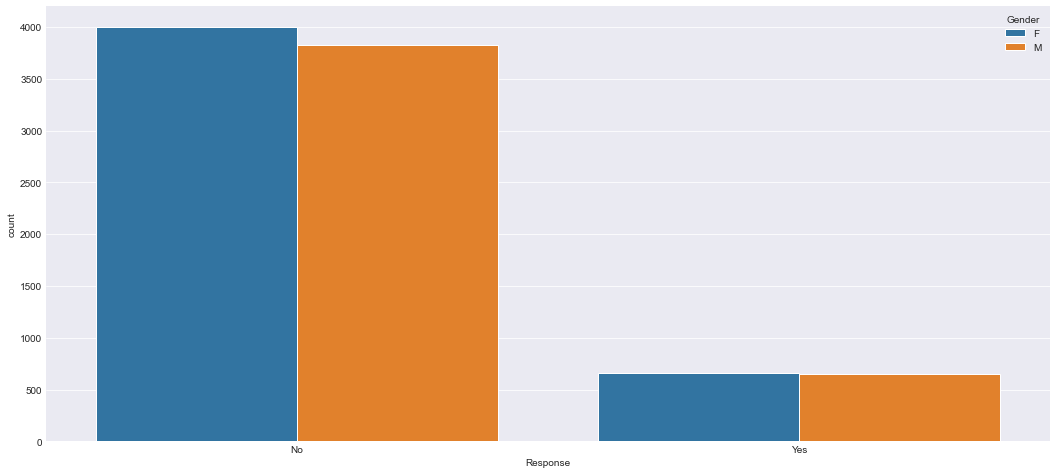

In [19]:
plt.figure(figsize=(18, 8))

sns.countplot("Response", hue="Gender", data = df)

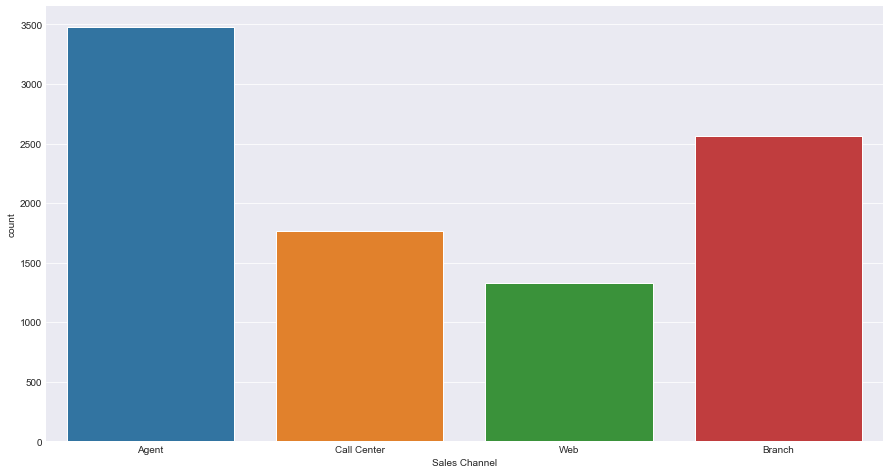

In [20]:
plt.figure(figsize=(15, 8))

sns.countplot(df["Sales Channel"])

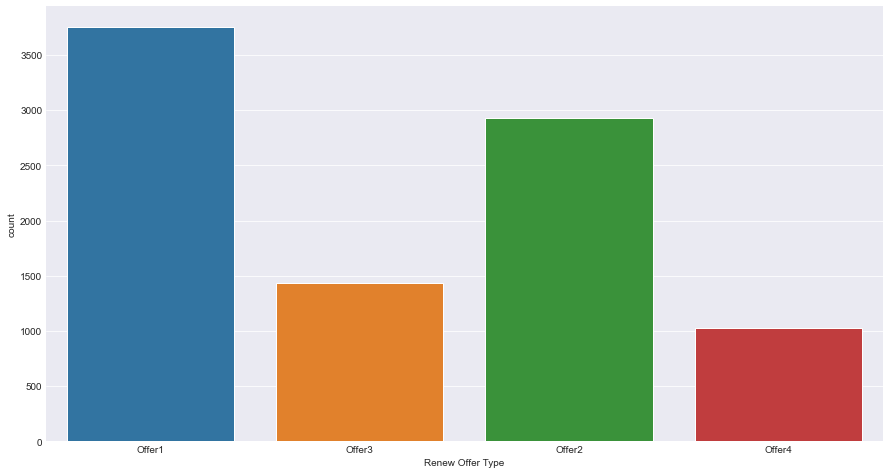

In [21]:
plt.figure(figsize=(15, 8))

sns.countplot(df["Renew Offer Type"])

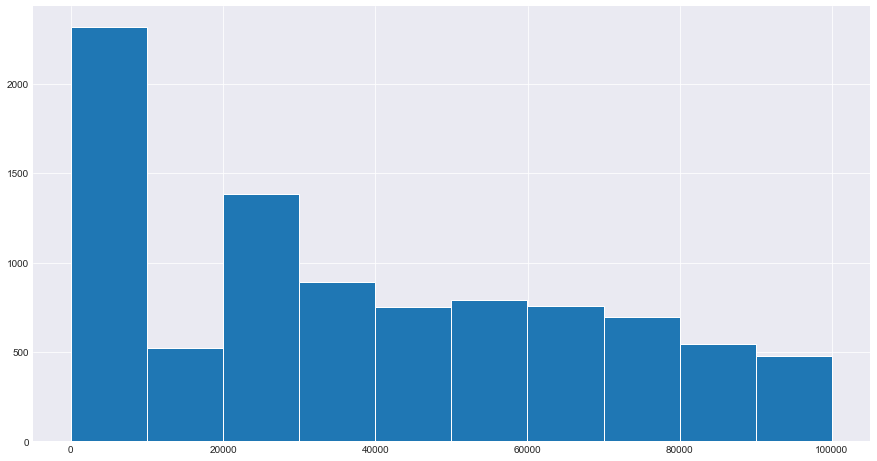

In [22]:
plt.figure(figsize=(15, 8))
plt.hist(df["Income"]);

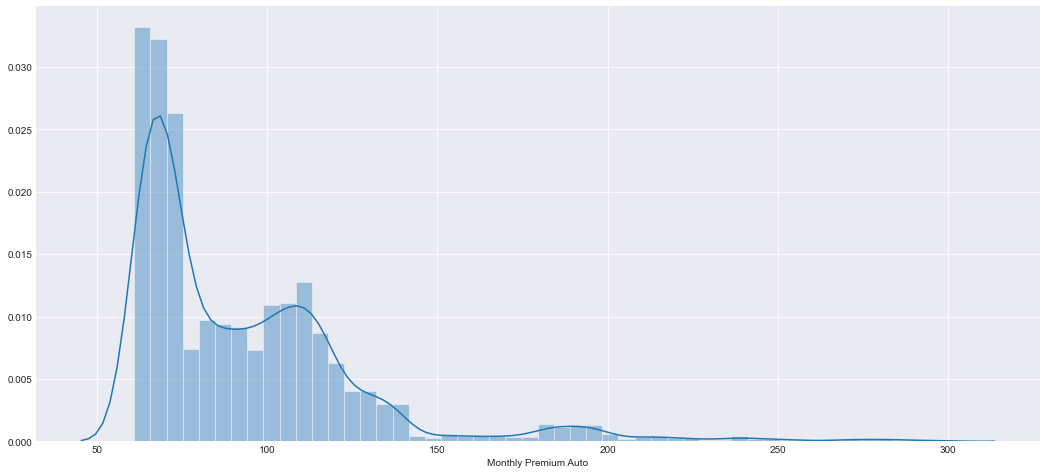

In [23]:
plt.figure(figsize=(18, 8))

sns.distplot(df["Monthly Premium Auto"])

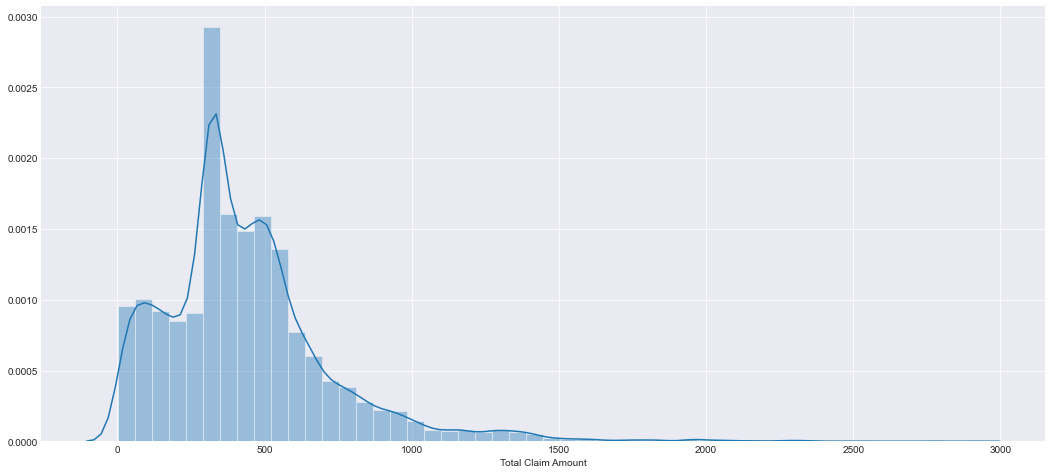

In [24]:
plt.figure(figsize=(18, 8))

sns.distplot(df["Total Claim Amount"])

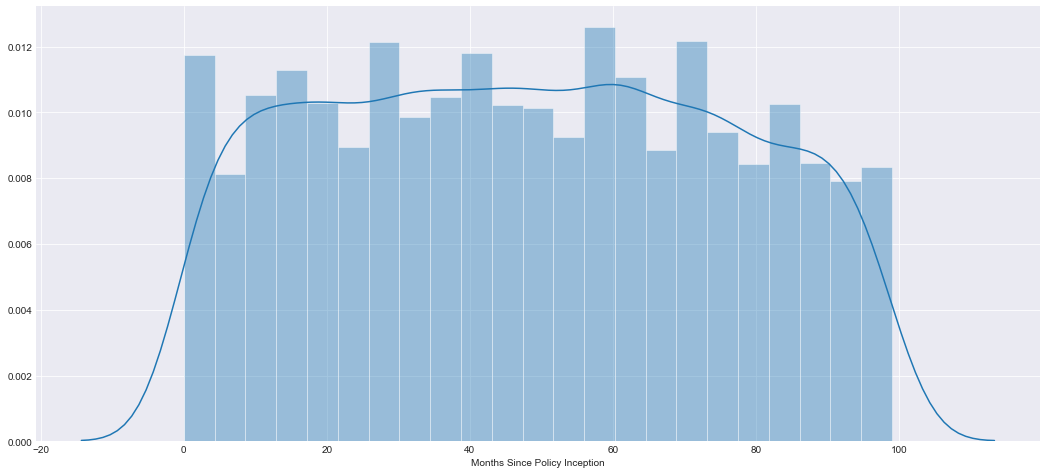

In [25]:
plt.figure(figsize=(18, 8))

sns.distplot(df["Months Since Policy Inception"])

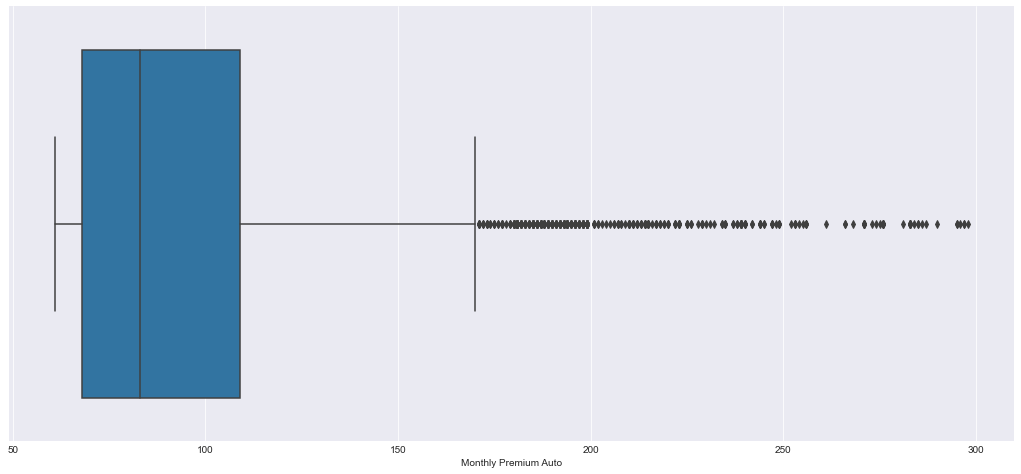

In [26]:
plt.figure(figsize=(18, 8))

sns.boxplot(df["Monthly Premium Auto"])

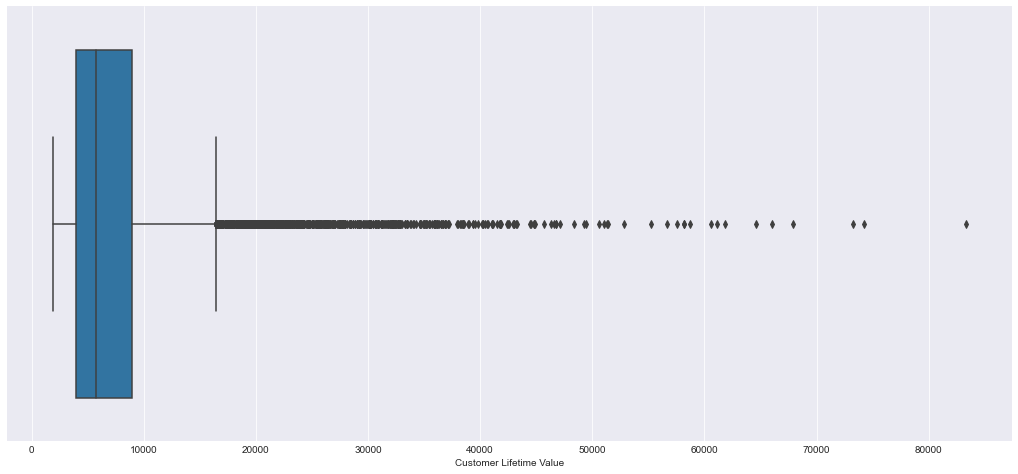

In [27]:
plt.figure(figsize=(18, 8))

sns.boxplot(df["Customer Lifetime Value"])

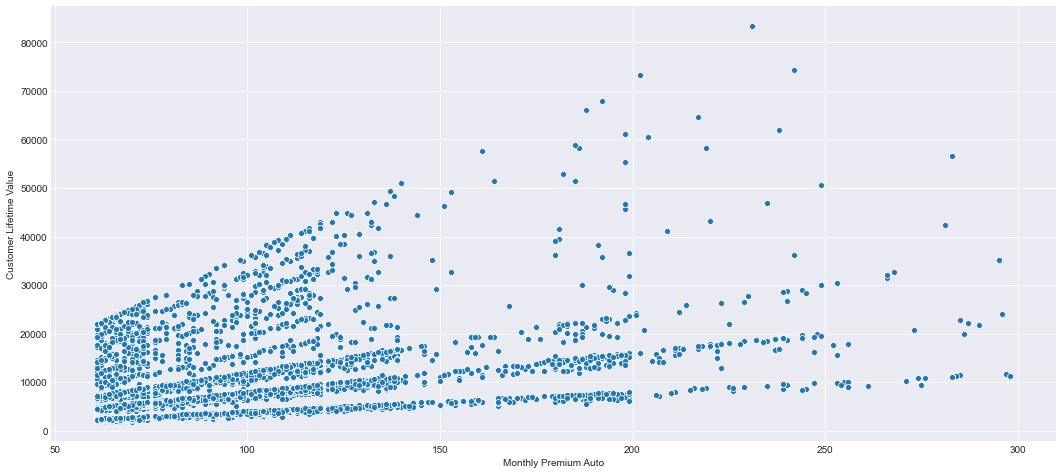

In [28]:
plt.figure(figsize=(18, 8))

sns.scatterplot(data = df, x = "Monthly Premium Auto", y="Customer Lifetime Value")

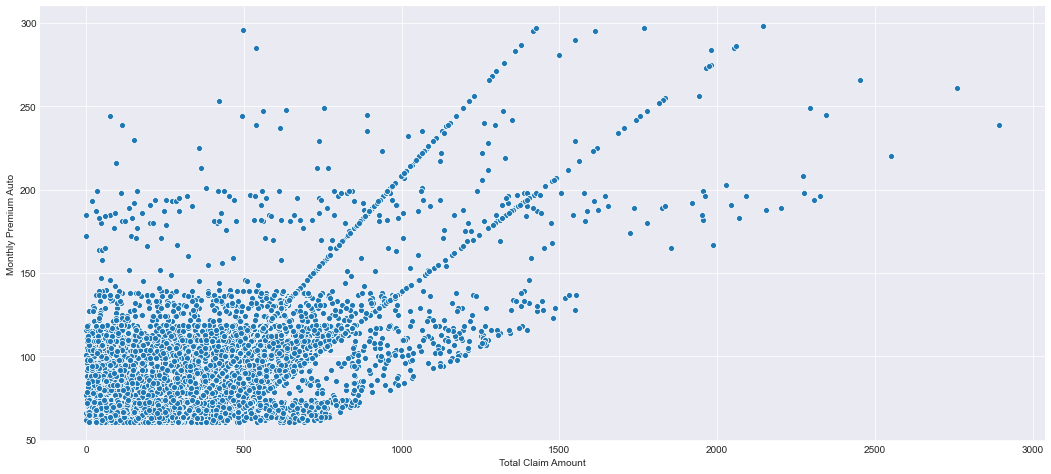

In [29]:
plt.figure(figsize=(18, 8))

sns.scatterplot(data = df, x = "Total Claim Amount", y="Monthly Premium Auto")

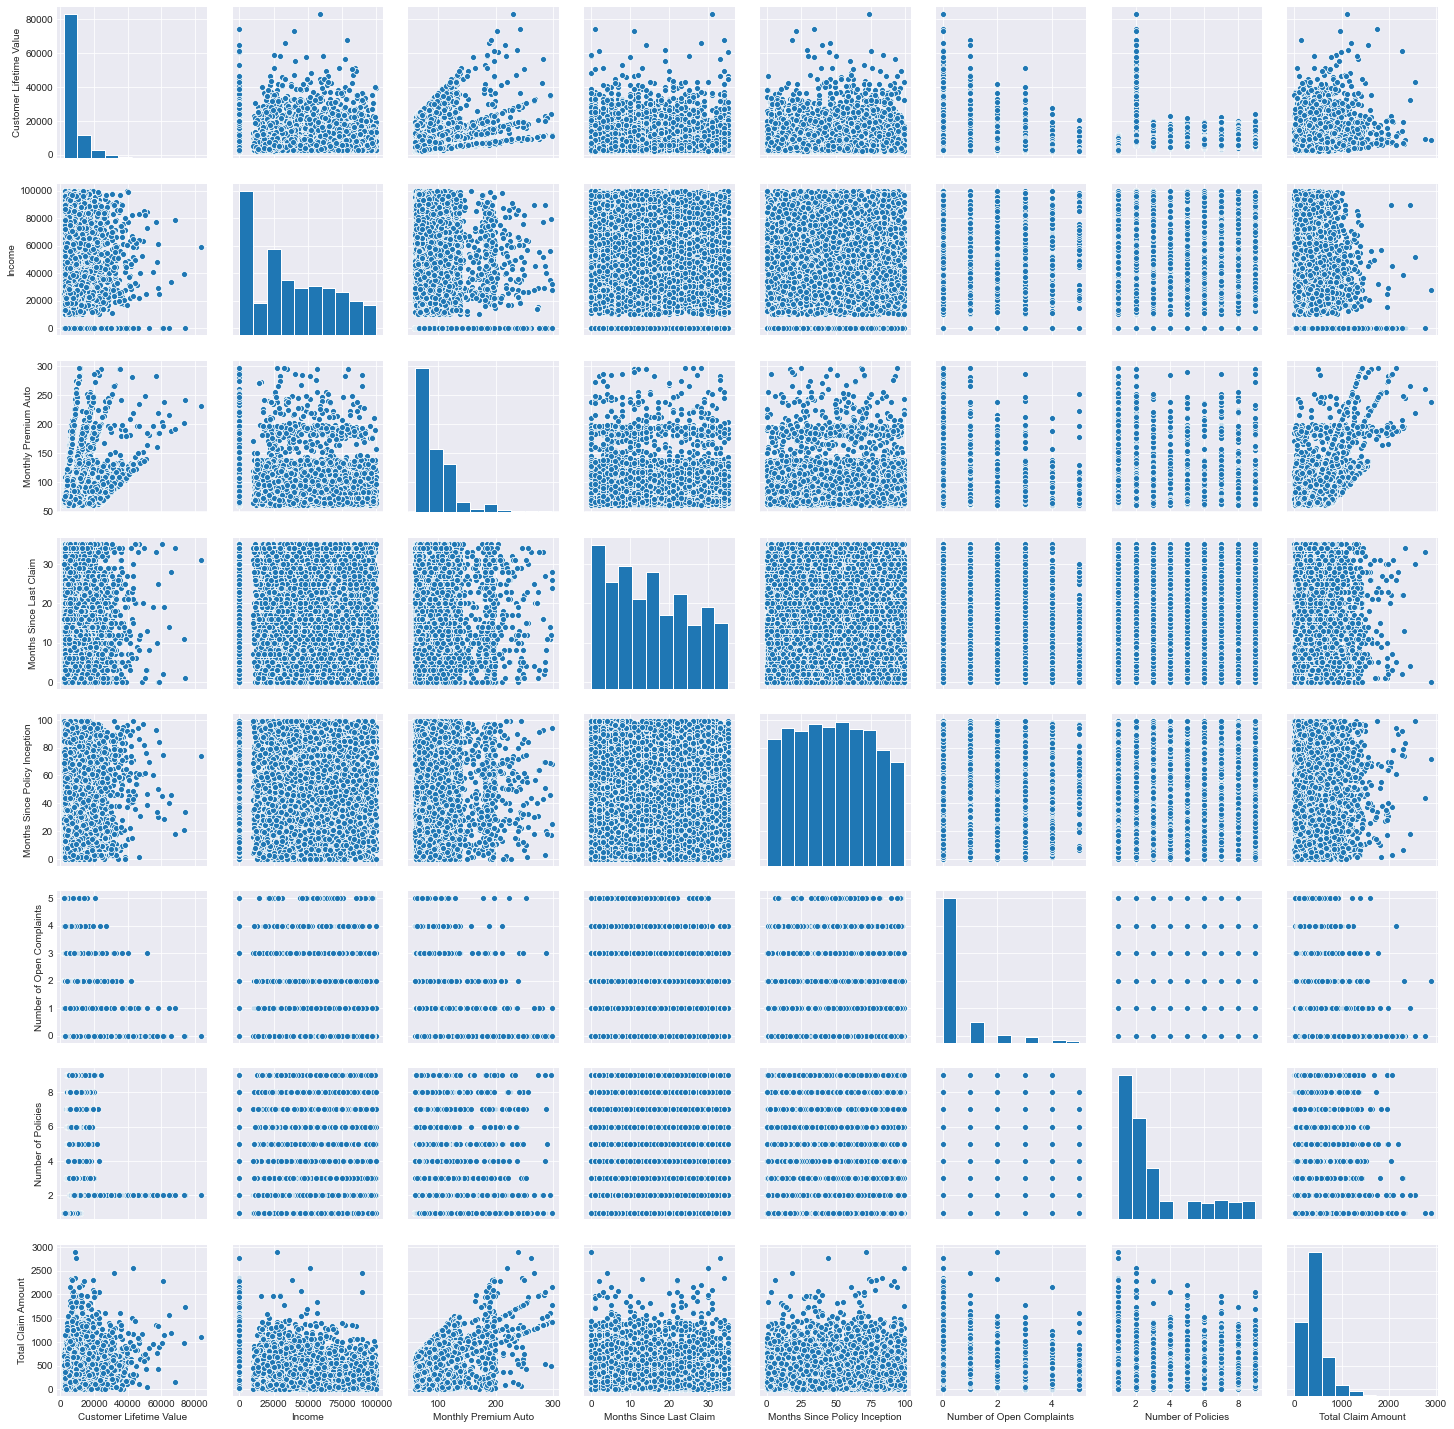

In [30]:
sns.pairplot(df)

In [31]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


# Treino e Teste

In [34]:
x = df['Monthly Premium Auto'].values.reshape(-1,1)
y = df['Customer Lifetime Value'].values.reshape(-1,1)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape

(7307, 1)

In [37]:
y_train.shape

(7307, 1)

In [38]:
X_test.shape

(1827, 1)

In [39]:
y_test.shape

(1827, 1)

# Modelo de regressão linear

In [42]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear_fit = model_linear.fit(X_train, y_train)
model_pred = model_linear.predict(X_train)
model_pred

array([[ 8771.14873492],
       [ 6155.15609669],
       [ 6809.15425624],
       ...,
       [ 6073.40632674],
       [ 9343.39712454],
       [16700.87641958]])

In [43]:
model_linear.intercept_

array([432.67220054])

In [44]:
model_linear.coef_

array([[81.74976994]])

In [45]:
model_linear.coef_ * 27.74456356 + model_linear.intercept_

array([[2700.78388879]])

In [50]:
y_pred = model_linear.predict(X_test)
y_pred

array([[ 6155.15609669],
       [ 5991.6565568 ],
       [10160.89482399],
       ...,
       [ 9506.89666443],
       [ 6482.15517646],
       [ 6236.90586663]])

In [51]:
# Grafico

pred = model_linear.predict(X_train)
pred

array([[ 8771.14873492],
       [ 6155.15609669],
       [ 6809.15425624],
       ...,
       [ 6073.40632674],
       [ 9343.39712454],
       [16700.87641958]])

In [52]:
pred2 = y_train - pred
pred2

array([[ 5311.49044508],
       [ 1978.00111531],
       [-3875.65620424],
       ...,
       [ 2041.00280926],
       [ 3561.54623546],
       [-9036.65716458]])

Text(0, 0.5, 'Total de campanhas')

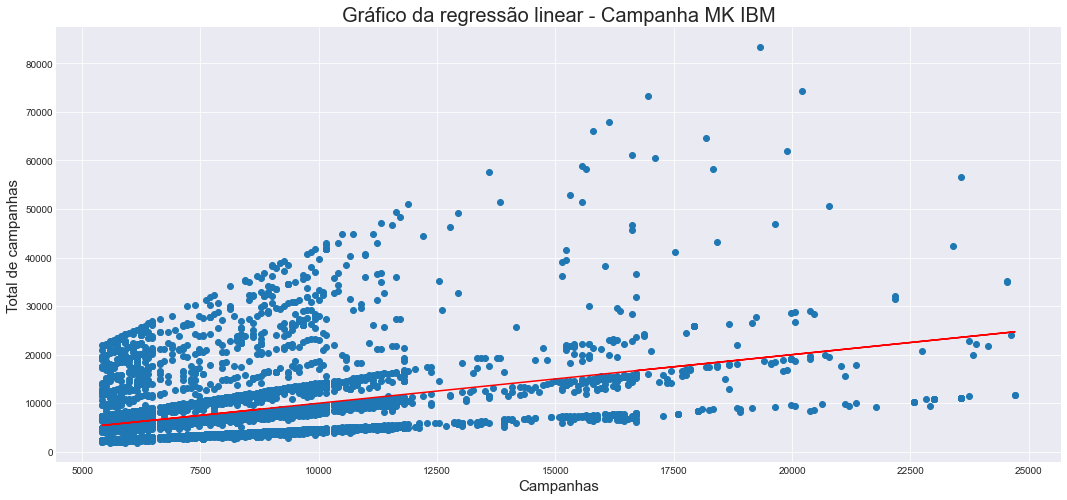

In [53]:
plt.figure(figsize=(18, 8))

plt.scatter(pred, y_train)
plt.plot(pred, model_linear.predict(X_train), color = "red")
plt.title("Gráfico da regressão linear - Campanha MK IBM", fontsize = 20)
plt.xlabel("Campanhas", fontsize = 15)
plt.ylabel("Total de campanhas", fontsize = 15)

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
from math import sqrt

print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2", r2_score(y_test, y_pred))

MSE: 6123.717820331538
MAE: 3833.297443390627
RMSE 6123.717820331538
R2 0.11048998349412353


# Previsão de Clientes

In [55]:
X_test[0:1]

array([[70]], dtype=int64)

In [61]:
pred_x = X_test[0: 2]
pred_x

array([[70],
       [68]], dtype=int64)

In [62]:
pred = model_linear.predict(pred_x)[0]
pred

array([6155.15609669])

# Salvando o modelo de regressão linear

In [63]:
import pickle

saida = open("modelo_previsao_IBM", "wb")
saida.close()